<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Ayudantia_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantía 3 - ICH3424: Ingeniería de Costas

## Animaciones 3D

### Superposición de ondas

$$\eta = \frac{H}{2}\cos( k\cos(\theta)x + k \sin(\theta)y - \omega t )$$

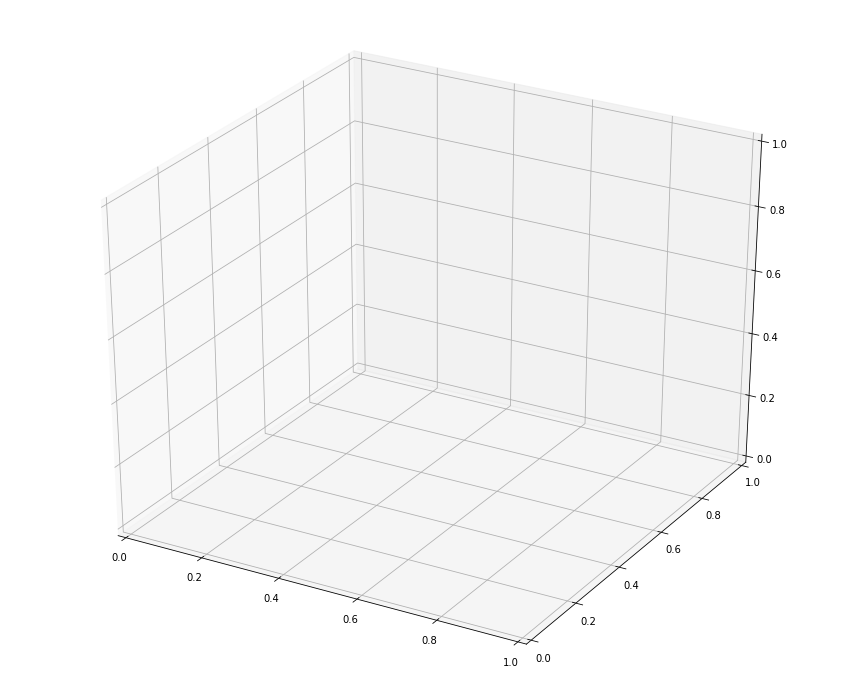

In [ ]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML

ancho = 15 
alto  = 12.5

fig = plt.figure(figsize=(ancho,alto))
ax  = plt.axes(projection='3d') 


In [ ]:
# Ecuación de Dispersión
def disper(T,h,delta_c=0.0001,tol=1e-6):
  #constante
  g = 9.81 #m/s2
  f = 1/T
  C = np.sqrt(g*h)
  for i in range(15):
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

In [5]:
#Inputs
H = np.array([0.5, 0.2, 3.0, 1.0, 0.75]) #(m)
theta = np.array([45, 75, 25, 10, 130])*(np.pi/180) # (rad)
#theta = np.array([0, 0, 0, 0, 0])*(np.pi/180) # (rad)
T = np.array([10, 15, 8, 12, 20]) #(s)
h = 50 #(m)

w = 2*np.pi/T # (rad/s)

k = np.zeros(len(T)) # (1/m)
L = np.zeros(len(T)) # (m)
for i in range(len(T)):
  C = disper(T[i],h)
  k[i] = w[i]/C
  L[i] = C*T[i]


Lmax = np.max(L)

dx = 1
x = np.arange(0,(2*Lmax)+dx,dx)
dy = 1
y = np.arange(0,(2*Lmax)+dy,dy)

X, Y = np.meshgrid(x,y)

surf = [ax.plot_surface(X,Y, np.zeros(np.shape(X)) )]

def animate(t):
  ax.clear()
  eta_sum = 0
  for i in range(len(T)):
    eta = (H[i]/2)*np.cos( (k[i]*np.cos(theta[i])*X) +  (k[i]*np.sin(theta[i])*Y) - (w[i]*t) )
    eta_sum = eta + eta_sum
  surf[0] = ax.plot_surface(X,Y,eta_sum)
  ax.set_zlim3d([-h, np.sum(H)])
  ax.set_xlabel('X (m)')
  ax.set_ylabel('Y (m)')
  ax.set_zlabel('Z (m)')
  ax.set_title('Estado de Mar')
  ax.view_init(30, 45+5*t)#2*np.pi*t) (elevacion, azimuth)
  return surf

t_total = 25 #(s)

anim = animation.FuncAnimation(fig,animate,frames=t_total, interval=200, blit=True)

HTML(anim.to_jshtml())

## Lectura de Datos

### Serie de tiempo para un Estado de Mar

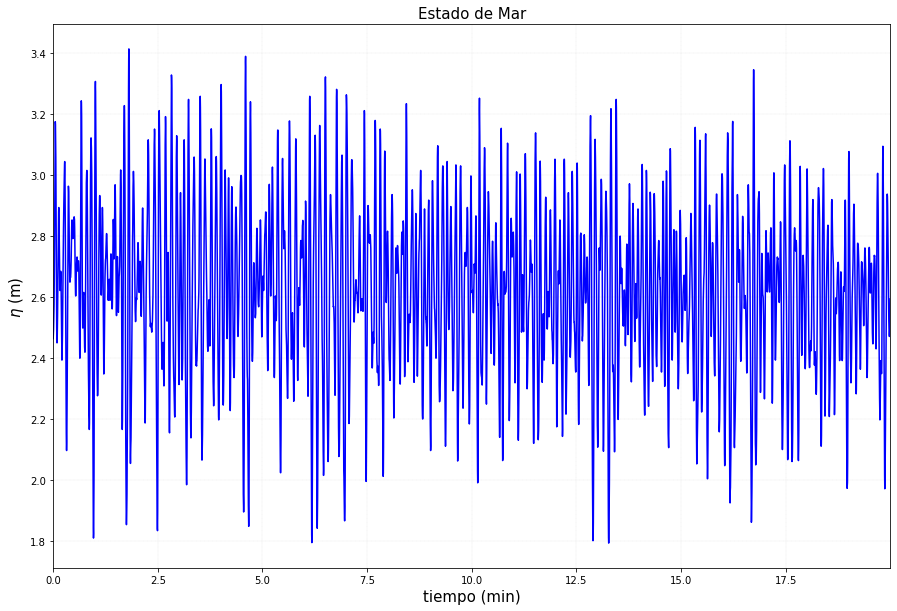

In [6]:
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/WD-06.dat',skiprows=1)
#print(data)

tiempo = data[:,0]/60 #(min)
eta    = data[:,1] #(m)

alto = 10 
ancho = 15
fig, ax = plt.subplots(figsize=(ancho,alto))

ax.plot(tiempo,eta, 'b')
ax.set_xlim(np.min(tiempo),np.max(tiempo))
ax.set_xlabel('tiempo (min)',fontsize = 15)
ax.set_ylabel('$\eta$ (m)',fontsize = 15)
ax.set_title('Estado de Mar',fontsize = 15)
ax.grid(color='lightgray', linestyle='--', linewidth=0.25)

plt.show()

### Serie de Tiempo de Marea

Este tipo de Series puede ser descargada desde [IOC LEVEL](http://www.ioc-sealevelmonitoring.org)

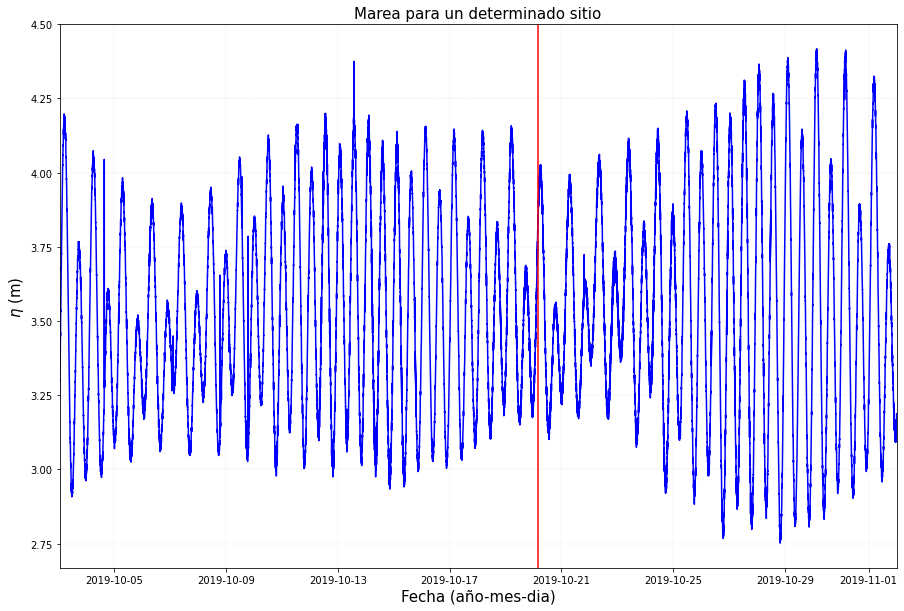

In [7]:
# importamos datetime
from datetime import datetime

data2 = np.loadtxt('/content/drive/My Drive/Colab Notebooks/marea.txt',skiprows=2) 
#print(data2)

date_time = data2[:,:5+1]
etas      = data2[:,6:7+1]
#print(etas)
#print(date_time)

date_time = date_time.astype(int)

#convertimos arreglo de fechas a Juliano
time_date = [datetime(date_time[i,0],date_time[i,1],date_time[i,2],date_time[i,3],date_time[i,4],date_time[i,5]) for i in range(len(date_time)) ] 

alto = 10 
ancho = 15
fig, ax = plt.subplots(figsize=(ancho,alto))

ax.plot(time_date,etas[:,1],'b')


x = datetime(2019,10,20,3,34,8)

ax.axvline(x=x,color='r',linewidth=1.5)

ax.set_xlim(np.min(time_date),np.max(time_date))
ax.set_xlabel('Fecha (año-mes-dia)',fontsize = 15)
ax.set_ylabel('$\eta$ (m)',fontsize = 15)
ax.set_title('Marea para un determinado sitio',fontsize = 15)
ax.grid(color='lightgray', linestyle='--', linewidth=0.25)

plt.show()

